In [13]:
%pip install pyg_lib -f https://data.pyg.org/whl/torch-2.1.0+cu121.html
%pip install torch-geometric
# %pip install torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-2.1.0+cu121.html

Defaulting to user installation because normal site-packages is not writeable
Looking in links: https://data.pyg.org/whl/torch-2.1.0+cu121.html
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [14]:
import os
import random

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [15]:
raw_dir = '../data/raw/'
pp_dir = '../data/interim/'

In [16]:
column_names= [
    'movie title',
    'release date',
    'video release date',
    'IMDb URL',
    'unknown',
    'Action',
    'Adventure',
    'Animation',
    "Children's",
    'Comedy',
    'Crime',
    'Documentary',
    'Drama',
    'Fantasy',
    'Film-Noir',
    'Horror',
    'Musical',
    'Mystery',
    'Romance',
    'Sci-Fi',
    'Thriller',
    'War',
    'Western'
]
df = pd.read_csv(
  raw_dir+"ml-100k/u.item",
  sep="|",
  encoding="ISO-8859-15",
  names=column_names
).drop(['video release date', 'IMDb URL'], axis=1)
df.head()

,movie title,release date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1,Toy Story (1995),01-Jan-1995,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),01-Jan-1995,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),01-Jan-1995,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),01-Jan-1995,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),01-Jan-1995,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


#### Load interaction data

In [38]:
interaction_column_names = ['user id',
                            'item id',
                            'rating',
                            'timestamp']

int_all = pd.read_csv(
  raw_dir+"ml-100k/u.data",
  sep="\t",
  # encoding="ISO-8859-15",
  names=interaction_column_names
)
int_all.head()

,user id,item id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


#### What does the data look like?

In [39]:
int_all.head()

,user id,item id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


#### How many unique users and items are in the dataset?

In [40]:
int_all[['user id', 'item id']].nunique()

user id     943
item id    1682
dtype: int64

confirms the data in [u.info](../data/raw/ml-100k/u.info)

#### Confirm that there are no duplicate interactions

In [41]:

int_all.shape[0], int_all[['user id', 'item id']].drop_duplicates().shape[0]

(100000, 100000)

#### What ratings are the most frequent

In [45]:
int_all.groupby(['rating'])['rating'].count()

rating
1     6110
2    11370
3    27145
4    34174
5    21201
Name: rating, dtype: int64

#### Plot rating frequency

In [43]:
movies_count_df = pd.DataFrame(int_all.groupby('item id').size(), columns=['count'])
movies_count_df.sample(n=10)

,count
item id,
1205,6
999,10
1064,4
756,128
1061,29
1474,6
456,48
1428,12
466,52


max reviews: [583]
min reviws: [1]


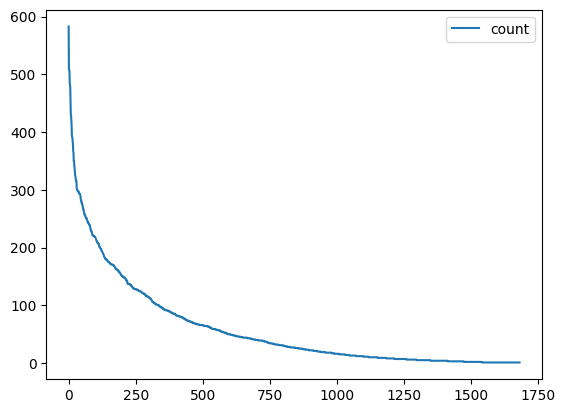

In [44]:
movies_count_df.sort_values('count', ascending=False).reset_index(drop=True).plot()
print('max reviews:', movies_count_df.max().values)
print('min reviws:', movies_count_df.min().values)